<a href="https://colab.research.google.com/github/JChengecha/predicting_house_prices/blob/main/Predicting_house_prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices (Applying supervised learning algorithms)
---

 # The Research Question





To study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### The Metric for Success

To come up with a model that predicts the house prices given the available features in the dataset.
Supervised learning algorithms are to be used, namely:

* Multiple linear regression
* Lasso regression
* Ridge regression 
* ElasticNet regression

The model that has the highest R2 score is the model best suited. 

The R2 score represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit. 

###  The Experimental Design

Using the given link of the [dataset](http://bit.ly/IndependentProjectWeek7Dataset), we are required to import the dataset, clean the data then explore the resultant dataset.
Carrying out exploratory data analysis aids in the better understanding of the data.

We will first execute the Multiple linear model and use it as our base model for the other regression models

# Reading & Checking the Dataset

######Importing some of the libraries to used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

%matplotlib inline

In [3]:
df=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')


######previewing the dataset

In [4]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


######checking the information and datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Data Cleaning

######Dropping columns 
Dropping columns that will not be necessary for implementing the solution

In [6]:
df=df.drop(['lat',	'long'],axis=1)

######checking for null values

In [7]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

######checking duplicates and removing them

In [8]:
df.duplicated().sum()

3

In [9]:
df=df.drop_duplicates()
df.duplicated().sum()

0

######Checking for Outliers
will be checking for the continous variables

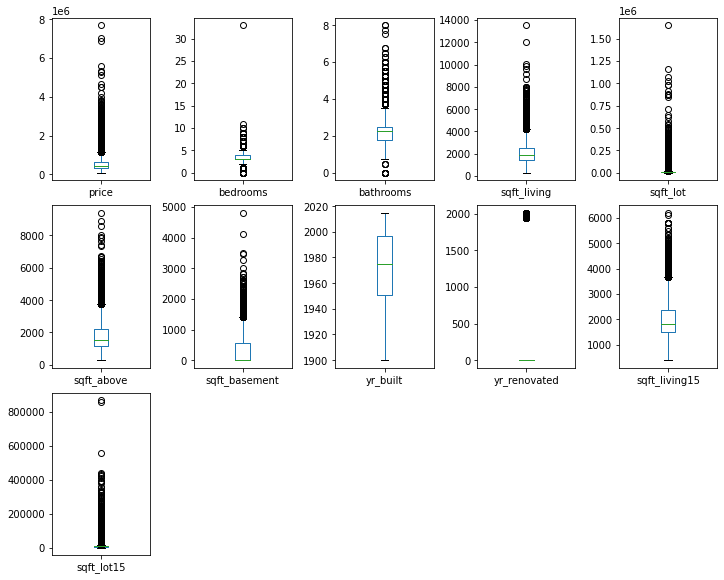

In [16]:
plt.subplot(351)
df['price'].plot.box(figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.subplot(352)
df['bedrooms'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(353)
df['bathrooms'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(354)
df['sqft_living'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(355)
df['sqft_lot'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(356)
df['sqft_above'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(357)
df['sqft_basement'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(358)
df['yr_built'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(359)
df['yr_renovated'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(3,5,10)
df['sqft_living15'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(3,5,11)
df['sqft_lot15'].plot.box()
plt.tight_layout(pad=0.5)

Seemingly, the dataset contains numerous outliers in the various columns

In an attempt to reduce bias, I filtered the data such that the extreme outliers were removed specifically in the 

* bedrooms 
* sqft_living 
* sqft_lot    
* sqft_lot15

In [18]:
df=df[df['bedrooms']<30]
df=df[df['sqft_living']<11000]
df=df[df['sqft_lot']<1000000]
df=df[df['sqft_lot15']<800000]


#  Exploratory Analysis

###### Frequency tables
of the various feat associated with the houses

In [ ]:
print('The Popular number of floors per House\n',df.floors.value_counts())
print('\nIs waterfront Popular? \n',df.waterfront.value_counts())
print('\nIs a view Popular \n',df.view.value_counts())
print('\nThe most common conditions given to a house \n',df.condition.value_counts())
print('\nThe most common grade given\n',df.grade.value_counts())
print('\nThe Popular number of bathrooms per House\n',df.bathrooms.value_counts())
print('\nThe Popular number of bedrooms per House\n',df.bedrooms.value_counts())


The Popular number of floors per House
 1.0    10680
2.0     8238
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Is waterfront Popular? 
 0    21447
1      163
Name: waterfront, dtype: int64

Is a view Popular 
 0    19487
2      963
3      509
1      332
4      319
Name: view, dtype: int64

The most common conditions given to a house 
 3    14029
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64

The most common grade given
 7     8981
8     6066
9     2614
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

The Popular number of bathrooms per House
 2.50    5378
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4

######Barcharts

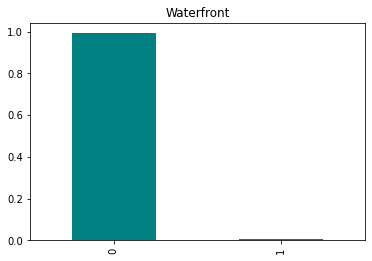

In [22]:
df.waterfront.value_counts(normalize=True).plot(kind = 'bar', title = "Waterfront",color='teal')
plt.show()

insight1:

Very few houses have waterfronts

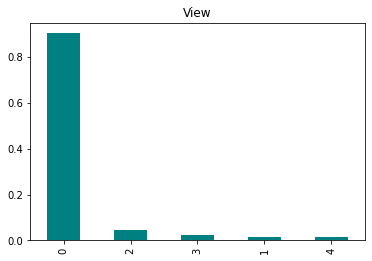

In [23]:
df.view.value_counts(normalize=True).plot(kind = 'bar', title = "View",color='teal')
plt.show()

insight2: 

Many houses do not have views

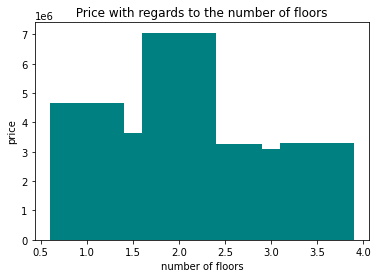

In [24]:
plt.bar(df['floors'], df['price'],color='teal')
plt.ylabel("price")
plt.xlabel("number of floors")
plt.title(" Price with regards to the number of floors ")
plt.show()

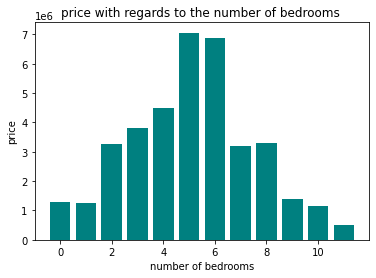

In [25]:
plt.bar(df['bedrooms'],df['price'],color='teal')
plt.xlabel("number of bedrooms")
plt.ylabel("price")
plt.title("price with regards to the number of bedrooms ")
plt.show()

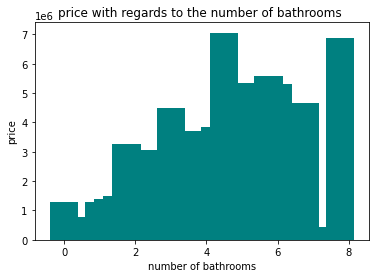

In [26]:
plt.bar(df['bathrooms'],df['price'],color='teal')
plt.xlabel("number of bathrooms")
plt.ylabel("price")
plt.title("price with regards to the number of bathrooms ")
plt.show()

######Histograms

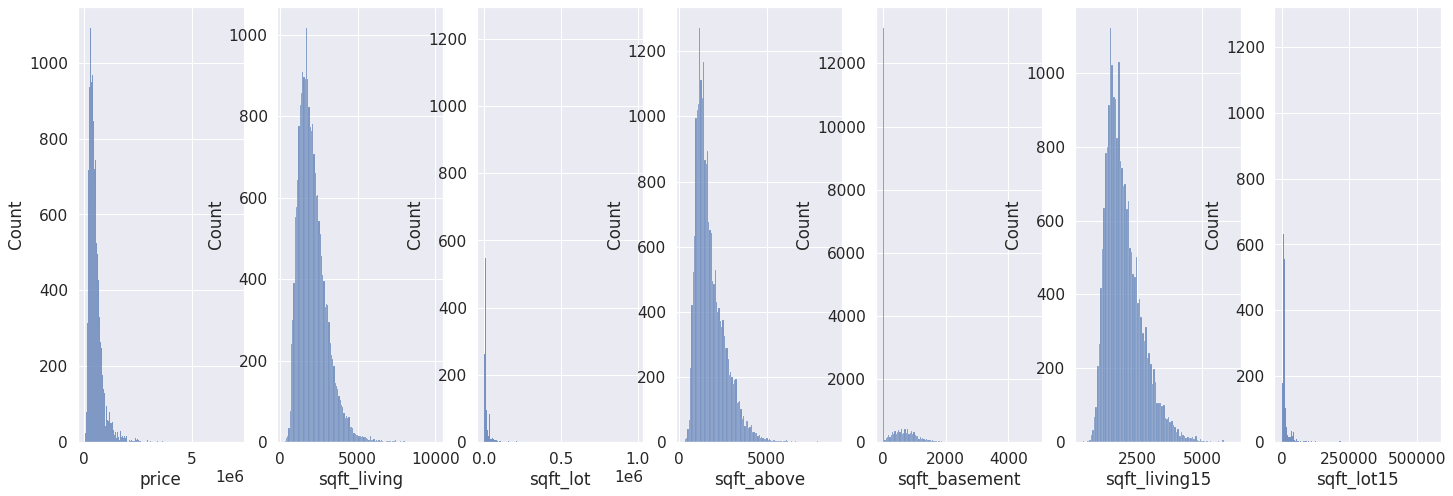

In [27]:
sns.set(font_scale=1.4)
plt.figure(figsize=(28,8))


#fig.suptitle('Histograms of the price and space of the Houses')
plt.subplot(181)
sns.histplot(df['price'])

plt.subplot(182)
sns.histplot(df['sqft_living'])

plt.subplot(183)
sns.histplot(df['sqft_lot'])

plt.subplot(184)
sns.histplot(df['sqft_above'])

plt.subplot(185)
sns.histplot(df['sqft_basement'])

plt.subplot(186)
sns.histplot(df['sqft_living15'])

plt.subplot(187)
sns.histplot(df['sqft_lot15'])
plt.show()

the histograms are an attempt to view some of the distributions of the columns

######More analysis

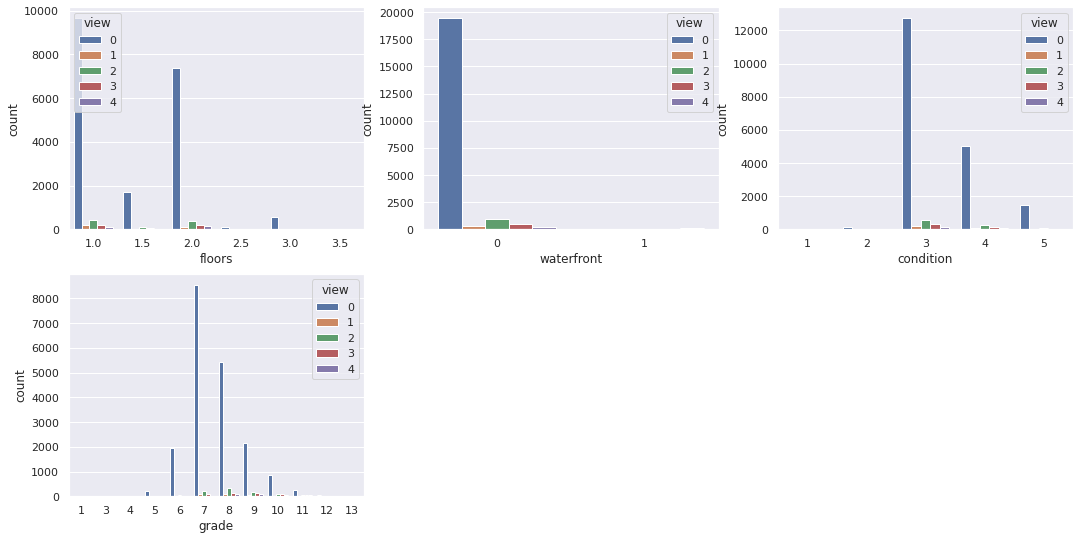

In [30]:
sns.set(rc={'figure.figsize':(18,9)})
plt.subplot(231)
sns.countplot(x="floors", hue='view', data=df)
plt.subplot(232)
sns.countplot(x="waterfront", hue='view', data=df)
plt.subplot(233)
sns.countplot(x="condition", hue='view', data=df)
plt.subplot(234)
sns.countplot(x="grade", hue='view', data=df)
plt.show()

The above barcharts help in gathering insights concerning the houses with regards to having or not having views

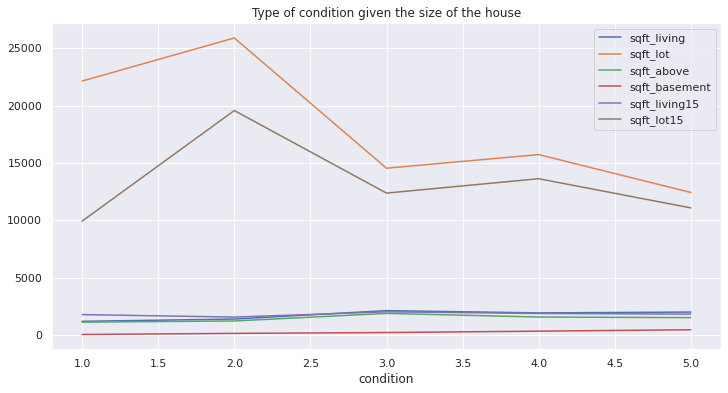

In [32]:
condition_to_size = df.groupby('condition').mean()[['sqft_living',	'sqft_lot', 'sqft_above',	'sqft_basement', 'sqft_living15',	'sqft_lot15']]
sns.set(rc={'figure.figsize':(12,6)})
condition_to_size.plot.line()
plt.title('Type of condition given the size of the house')
plt.show()

The above linegraph highlights the various conditions of a houses given the size of the house

######Heatmap

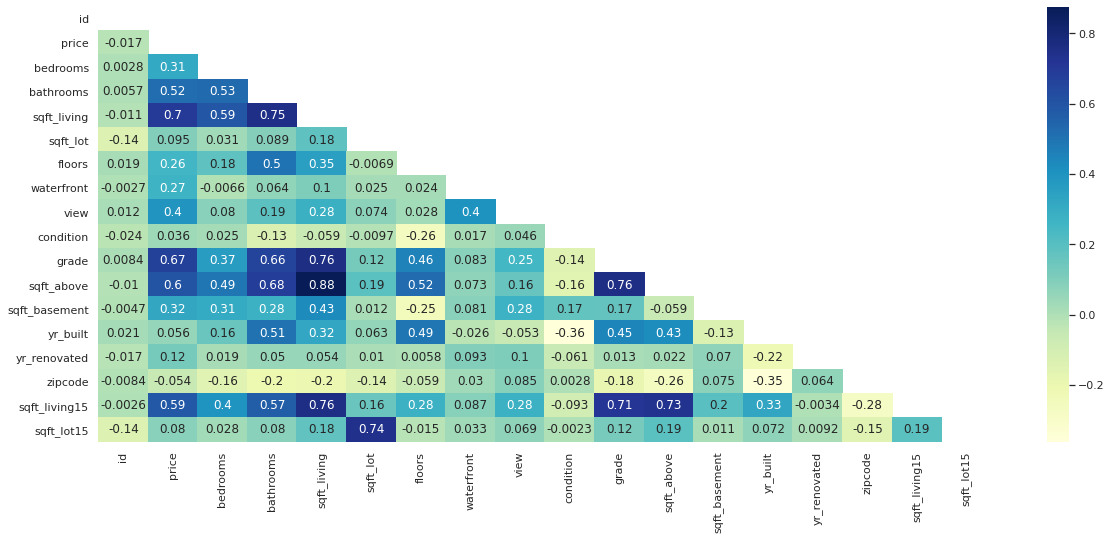

In [34]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(df.corr(),
mask=mask,annot=True,cmap="YlGnBu")

######pairplot

<Figure size 864x576 with 0 Axes>

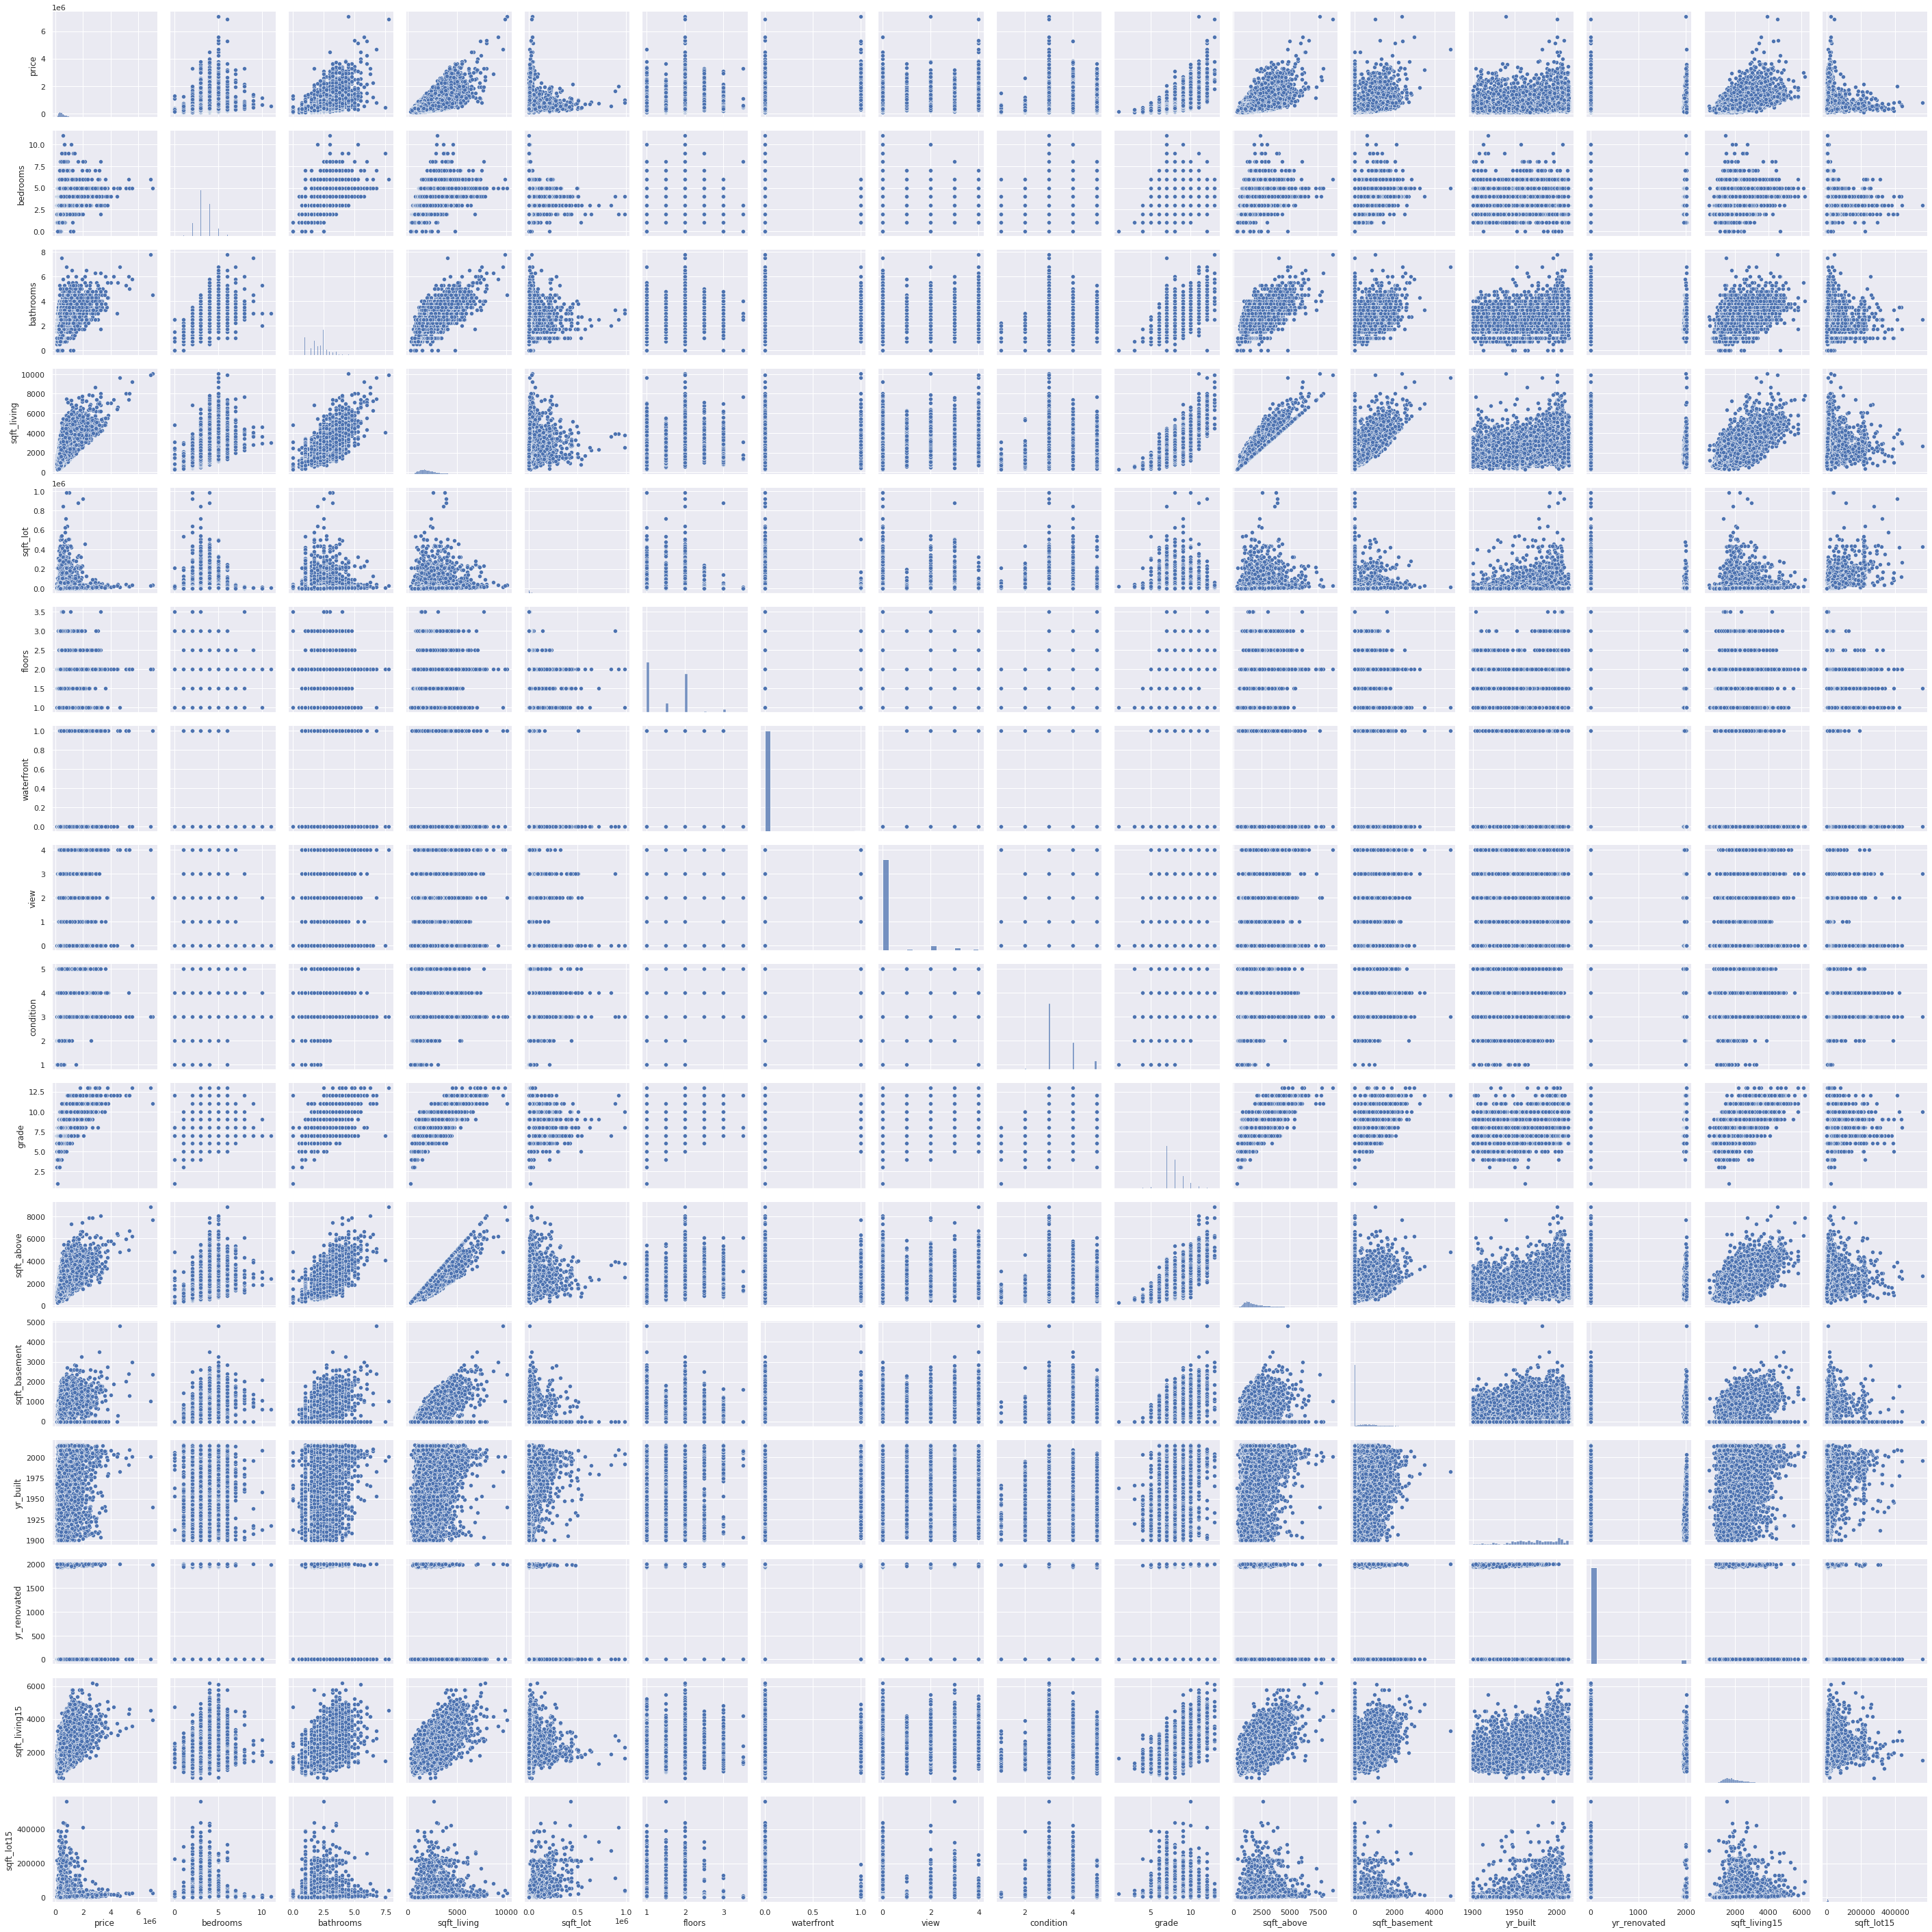

In [35]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                  'waterfront',	'view',	'condition',	'grade',	'sqft_above',	'sqft_basement',
                  'yr_built',	'yr_renovated','sqft_living15',	'sqft_lot15']],)


#  Implementing the Solution

### First Check for Multicollinearity


In [36]:
# Removing the id column, we want to focus on our independent variables only.
independent_only = df.drop(columns=['id','price'])

# the correlations between the variables
correlations=independent_only.corr()

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.710025,-0.486821,-2.173750e+00,0.072606,0.057497,0.067878,0.112168,-0.048950,0.341944,1.013428e+00,5.336575e-01,0.137293,0.046686,0.091767,0.043263,0.070356
bathrooms,-0.486821,3.339577,-2.423291e+00,-0.010448,-0.682410,0.007231,-0.042187,-0.135473,-0.295979,9.718896e-01,1.081475e-01,-0.914116,-0.257843,0.009596,0.090596,0.077878
sqft_living,-2.173880,-2.419468,1.904659e+13,-0.170137,1.729282,0.015934,-0.747801,-0.059346,-1.874773,-1.722126e+13,-9.215444e+12,0.653765,0.157927,-0.470587,-0.681928,-0.067803
sqft_lot,0.072606,-0.010448,-1.716338e-01,2.266161,0.085543,0.029773,-0.057789,0.024999,-0.025457,-1.424440e-01,3.647033e-02,0.031897,0.008970,0.060403,0.174758,-1.646456
floors,0.057497,-0.682410,1.726431e+00,0.085543,1.987586,-0.006676,-0.034560,0.096508,-0.297229,-2.025181e+00,-2.435379e-01,-0.407956,-0.071410,-0.262794,0.295554,0.073813
waterfront,0.067878,0.007231,1.530575e-02,0.029773,-0.006676,1.204594,-0.495262,-0.012922,0.049450,-1.319553e-01,-1.747672e-02,-0.014933,-0.065138,0.014447,0.064821,-0.021472
view,0.112168,-0.042187,-7.470558e-01,-0.057789,-0.034560,-0.495262,1.418751,-0.027492,-0.168934,7.138873e-01,1.076945e-01,0.142332,-0.041340,-0.140965,-0.302246,0.001869
condition,-0.048950,-0.135473,-5.965543e-02,0.024999,0.096508,-0.012922,-0.027492,1.245942,-0.034799,9.517128e-02,-6.619251e-02,0.544773,0.204637,0.178524,0.082601,-0.032555
grade,0.341944,-0.295979,-1.865166e+00,-0.025457,-0.297229,0.049450,-0.168934,-0.034799,3.258309,1.663798e-01,3.479955e-01,-0.450337,-0.047276,-0.142650,-0.859817,0.127688
sqft_above,1.015127,0.966705,-1.722126e+13,-0.143740,-2.027147,-0.132555,0.714471,0.094858,0.175316,1.557087e+13,8.332284e+12,-0.218337,-0.161544,0.517210,-1.000680,-0.081528


The matrix above shows the VIFs of the various independent variables.
The following columns /independent variables have very high VIF values
* sqft_living,
* sqft_above,
* sqft_basement

Therefore highly recommended that they are removed

In [37]:
# Removing the columns, then chekcking the matrix again.
independent_only = df.drop(columns=['sqft_living','sqft_above','sqft_basement'])

# the correlations between the variables
correlations=independent_only.corr()

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,1.027185,0.046837,0.002532,-0.003173,0.084327,-0.002951,0.001633,-0.037061,0.020537,-0.037523,0.004982,0.014556,0.030764,-0.007969,0.091249
price,0.046837,2.651206,0.053209,-0.606390,-0.045247,-0.080604,-0.385770,-0.275098,-0.100520,-1.338243,0.862033,-0.029151,-0.007350,-0.450123,0.084587
bedrooms,0.002532,0.053209,1.490334,-0.843334,0.020363,0.076963,0.040993,0.073648,-0.059270,0.003977,0.255167,0.042032,0.081030,-0.277554,0.047135
bathrooms,-0.003173,-0.606390,-0.843334,2.858544,-0.055749,-0.455982,0.076916,-0.087815,-0.149673,-0.418231,-0.935410,-0.257090,-0.048527,-0.205933,0.031144
sqft_lot,0.084327,-0.045247,0.020363,-0.055749,2.255021,0.040841,0.029318,-0.046913,0.033695,-0.092856,0.034255,0.009660,0.073229,0.084521,-1.649504
floors,-0.002951,-0.080604,0.076963,-0.455982,0.040841,1.616964,-0.017010,0.097605,0.151927,-0.347622,-0.484108,-0.070913,-0.169556,0.154974,0.050106
waterfront,0.001633,-0.385770,0.040993,0.076916,0.029318,-0.017010,1.257597,-0.450595,0.004485,0.209291,-0.134318,-0.061176,0.020772,0.091418,-0.036721
view,-0.037061,-0.275098,0.073648,-0.087815,-0.046913,0.097605,-0.450595,1.404187,-0.035778,-0.036800,0.081335,-0.039152,-0.172676,-0.242253,-0.005860
condition,0.020537,-0.100520,-0.059270,-0.149673,0.033695,0.151927,0.004485,-0.035778,1.242748,0.020691,0.521276,0.206021,0.166273,0.113486,-0.031504
grade,-0.037523,-1.338243,0.003977,-0.418231,-0.092856,-0.347622,0.209291,-0.036800,0.020691,3.456292,-0.756715,-0.038779,-0.124379,-1.131885,0.040848


removing the columns that cause multicolinearity

In [38]:
df=df.drop(columns=['sqft_living','sqft_above','sqft_basement'])
df.head(2)

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,5650,1.0,0,0,3,7,1955,0,98178,1340,5650
1,6414100192,538000.0,3,2.25,7242,2.0,0,0,3,7,1951,1991,98125,1690,7639


### Selecting the target and independent variables
 then splitting to train and test sets

In [41]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [42]:
# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2, random_state=1)

## Model 1: Multiple Linear Regression 

In [43]:
# training the multiple linear regression model
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
# Making Predictions and getting the R2 of the model
from sklearn.metrics import r2_score
Rsquared_Multiple_L=r2_score(y_test,regressor.predict(X_test))
print("Multiple Linear MSE:", mean_squared_error(y_test, regressor.predict(X_test)))
print('\nR squared of the test: ',Rsquared_Multiple_L)

Multiple Linear MSE: 52111300375.77826

R squared of the test:  0.6171932483393963


In [50]:
# getting the coefficients of the model
linear_coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
linear_coeff_df

,Coefficient
bedrooms,-7425.629055
bathrooms,84486.994682
sqft_lot,7625.100203
floors,10823.984425
waterfront,48939.135672
view,37826.309558
condition,14864.132893
grade,184360.038508
yr_built,-117918.073102
yr_renovated,1448.892258


### Heteroskedasticity testing and Residual plots  

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

##### Residual plot

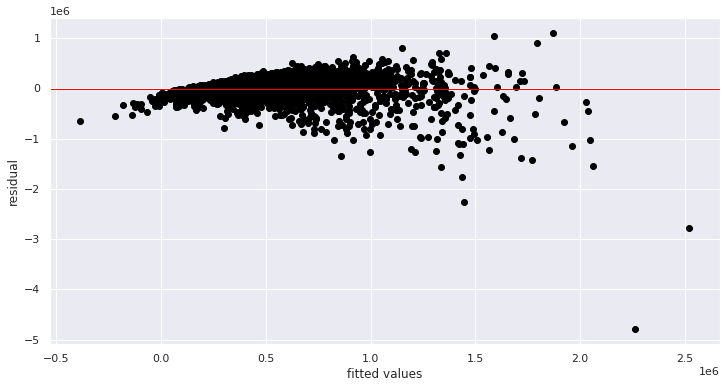

In [52]:
y_pred_multiple=regressor.predict(X_test)
# We now create the residual by substracting the test value from the predicted 
residuals = np.subtract(y_pred_multiple, y_test)

# plotting the  residuals 
plt.scatter(y_pred_multiple, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

most of the residuals are centered around a mean that is 0

##### Testing for heteroskedasticity using Bartletts test

In [53]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_multiple, residuals)

# compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_multiple)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


As shown above, the test establishes that the variance is equal for all our datapoints

## Model 2: Quantile Regression 

Here we will check for the 25% quantile,50% quantile and 75% quantile

In [93]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_lot +	floors +	waterfront + view +	condition +	grade +	yr_built + yr_renovated +	sqft_living15 +	sqft_lot15', df)
res = mod.fit(q=.25)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2748
Model:                       QuantReg   Bandwidth:                   2.308e+04
Method:                 Least Squares   Sparsity:                    3.980e+05
Date:                Fri, 28 May 2021   No. Observations:                21601
Time:                        21:25:55   Df Residuals:                    21588
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        6.5e+05   9.96e+04      6.525      0.000    4.55e+05    8.45e+05
bedrooms       1679.4808   1535.950      1.093      0.274   -1331.095    4690.057
bathrooms      2.515e+04   2466.769     10.195      0.000    2.03e+04       3e+04
sqft_lot          0.3406      0.049  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [90]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_lot +	floors +	waterfront + view +	condition +	grade +	yr_built + yr_renovated +	sqft_living15 +	sqft_lot15', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3803
Model:                       QuantReg   Bandwidth:                   2.445e+04
Method:                 Least Squares   Sparsity:                    3.507e+05
Date:                Fri, 28 May 2021   No. Observations:                21601
Time:                        20:48:27   Df Residuals:                    21588
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.595e+06   1.11e+05     41.329      0.000    4.38e+06    4.81e+06
bedrooms      -1287.3784   1601.514     -0.804      0.421   -4426.465    1851.708
bathrooms      5.333e+04   2562.118     20.814      0.000    4.83e+04    5.83e+04
sqft_lot          0.2776      0.048  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [94]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_lot +	floors +	waterfront + view +	condition +	grade +	yr_built + yr_renovated +	sqft_living15 +	sqft_lot15', df)
res = mod.fit(q=.75)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4315
Model:                       QuantReg   Bandwidth:                   2.276e+04
Method:                 Least Squares   Sparsity:                    4.765e+05
Date:                Fri, 28 May 2021   No. Observations:                21601
Time:                        21:26:08   Df Residuals:                    21588
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.345e+06   1.47e+05     22.681      0.000    3.06e+06    3.63e+06
bedrooms       5229.8551   2008.306      2.604      0.009    1293.428    9166.282
bathrooms      5.524e+04   3215.300     17.180      0.000    4.89e+04    6.15e+04
sqft_lot          0.2578      0.060  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


## Model 3: Lasso Regression 

In [56]:
# creating the lasso model and putting the some parameters on gridsearch such that the best parameters that fit the model are picked
lasso = Lasso(normalize=True) 
parameters = {'alpha': np.logspace(-5,2,8)}

gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [63]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
 
print("Lasso best parameters:", gridlasso.best_params_) 

print("\nLasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))

print("\nLasso R2 score:", gridlasso.score(X_test, y_test))

Lasso best parameters: {'alpha': 1.0}

Lasso R2 score: 0.6171487127359034

Lasso MSE: 52117362986.223236


In [65]:
# getting the coefficients of the model and comparing to the previous model

lasso_coeff_df = pd.DataFrame(gridlasso.best_estimator_.coef_, X.columns, columns=['Lasso_coefficients'])
lasso_coeff_df

compare = pd.concat([linear_coeff_df, lasso_coeff_df], axis=1)

compare

,Linear_coefficients,Lasso_coefficients
bedrooms,-7425.629055,-7092.407298
bathrooms,84486.994682,84224.335981
sqft_lot,7625.100203,7149.223125
floors,10823.984425,10661.435295
waterfront,48939.135672,48853.666027
view,37826.309558,37850.459633
condition,14864.132893,14713.803714
grade,184360.038508,184355.740734
yr_built,-117918.073102,-117665.206906
yr_renovated,1448.892258,1383.324849


In [80]:
Rsquared_Lasso=r2_score(y_test,gridlasso.predict(X_test))
Rsquared_Lasso

0.6171487127359034

## Model 4: Ridge Regression 

In [86]:
# creating the ridge model and putting the some parameters on gridsearch such that the best parameters that fit the model are picked
ridge = Ridge(normalize=True)
parameters={'alpha':np.logspace(-5,2,8)}
gridridge = GridSearchCV(estimator=ridge,param_grid=parameters,scoring='r2',n_jobs=1,refit=True,cv=10)

In [87]:
# training the model and getting the R2 of the model
gridridge.fit(X_train,y_train)
 
print("Ridge best parameters:", gridridge.best_params_) 

print("\nRidge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))

print("\nRidge R2 score:", gridridge.score(X_test, y_test))

Ridge best parameters: {'alpha': 0.001}

Ridge MSE: 52112154599.473495

Ridge R2 score: 0.6171869732590276


In [91]:
# getting the coefficients of the model and comparing to the previous models
ridge_coeff_df = pd.DataFrame(gridridge.best_estimator_.coef_, X.columns, columns=['Ridge_coefficients'])
ridge_coeff_df

compare1 = pd.concat([linear_coeff_df, lasso_coeff_df, ridge_coeff_df], axis=1)

compare1

,Linear_coefficients,Lasso_coefficients,Ridge_coefficients
bedrooms,-7425.629055,-7092.407298,-7313.063704
bathrooms,84486.994682,84224.335981,84332.646608
sqft_lot,7625.100203,7149.223125,7618.708876
floors,10823.984425,10661.435295,10851.009449
waterfront,48939.135672,48853.666027,48896.279815
view,37826.309558,37850.459633,37879.615543
condition,14864.132893,14713.803714,14924.834420
grade,184360.038508,184355.740734,183969.436163
yr_built,-117918.073102,-117665.206906,-117560.075195
yr_renovated,1448.892258,1383.324849,1535.815792


In [89]:
Rsquared_Ridge=r2_score(y_test,gridridge.predict(X_test))
Rsquared_Ridge

0.6171869732590276

## Model 5: Elastic Net Regression 

In [76]:
# creating the elastic net model and putting the some parameters on gridsearch such that the best parameters that fit the model are picked

elastic=ElasticNet(normalize=True)
gridelastic=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='r2',n_jobs=1,refit=True,cv=10)

In [77]:
#training the model and getting the R2
gridelastic.fit(X_train,y_train)

print("ElasticNet best parameters:", gridelastic.best_params_) 

print("\nElasticNet MSE:", mean_squared_error(y_test, gridelastic.predict(X_test)))

print("\nElasticNet R2 score:", gridelastic.score(X_test, y_test))

ElasticNet best parameters: {'alpha': 1e-05, 'l1_ratio': 0.8}

ElasticNet MSE: 52253122597.062744

ElasticNet R2 score: 0.6161514300878517


In [92]:
# Below are the coefficients of the models
# 
elastic_coeff_df = pd.DataFrame(gridelastic.best_estimator_.coef_, X.columns, columns=['ElasticNet_coefficients'])
elastic_coeff_df

compare1 = pd.concat([linear_coeff_df, lasso_coeff_df, ridge_coeff_df, elastic_coeff_df], axis=1)

compare1

,Linear_coefficients,Lasso_coefficients,Ridge_coefficients,ElasticNet_coefficients
bedrooms,-7425.629055,-7092.407298,-7313.063704,-3889.122119
bathrooms,84486.994682,84224.335981,84332.646608,79758.326954
sqft_lot,7625.100203,7149.223125,7618.708876,7373.249884
floors,10823.984425,10661.435295,10851.009449,11630.289522
waterfront,48939.135672,48853.666027,48896.279815,47541.947584
view,37826.309558,37850.459633,37879.615543,39464.307983
condition,14864.132893,14713.803714,14924.834420,16603.671640
grade,184360.038508,184355.740734,183969.436163,172208.489788
yr_built,-117918.073102,-117665.206906,-117560.075195,-106757.340001
yr_renovated,1448.892258,1383.324849,1535.815792,4068.932006


In [82]:
Rsquared_Elastic=r2_score(y_test,gridelastic.predict(X_test))
Rsquared_Elastic

0.6161514300878517

###comparing the R-squared of the models

In [85]:
compare2=pd.DataFrame(data=[Rsquared_Multiple_L,Rsquared_Lasso,Rsquared_Ridge,Rsquared_Elastic],
                      index=['multiplelinear','Lasso','Ridge','ElasticNet'],columns=['R-sqaured'])
compare2

,R-sqaured
multiplelinear,0.617193
Lasso,0.617149
Ridge,0.617187
ElasticNet,0.616151


# Challenging the solution

* In order to challenge the best fitting model, kfold cross validation / least_one_out cross validation methods would be best suited in an attempt to get a higher R2 score
* Treating more outlier values would also aid in getting better results

# Conclusions

* The data has many outliers in most of the columns 
* Before modeling, the data was tested for multicolinearity and the colinear variables were dropped.Furthermore, the data tested homogeneous for Heteroskedasticity.

* For the quantile regression,at 75% quantile(R2=0.4315),the model performed better than at 25% quantile( R2 = 0.2748) and 50% quantile (R2=0.3803) 
* There were very minute differences in R2 values.By comparing the R2 of the rest of the models, multiple linear regression model has a slightly higher R2 score followed by Ridge model,ElasticNet model and finaly Lasso model